# primero importamos las librerias

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### luego subimos el dataframe

In [2]:
df = pd.read_csv("dataset_fish.csv")

### damos un vistazo rapido a los datos

In [7]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


mapearemos el dato que sera y

In [10]:
df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [11]:
df.Species = df.Species.map({'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5, 'Pike':6, 'Smelt':7})

verificamos que se encuentre de manera correcta

In [12]:
df.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.880503,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,2.026298,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,1.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,2.000000,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,5.000000,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,5.000000,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,7.000000,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### Empezamos a separar los datos x de los datos Y, haremos un test de correlacion para ver cuales son los datos mas importantes a tomar en cuenta

In [15]:
corr = df.corr()
corr.style.background_gradient()

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.176783,-0.101176,-0.118425,-0.209489,-0.696969,-0.315235
Weight,-0.176783,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.101176,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.118425,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.209489,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.696969,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.315235,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [1024]:
data_x = df.drop(['Height'], axis=1)
data_y = df['Height']

Verificamos que se encuentre las columnas que deseamos

In [1025]:
data_x

,Species,Weight,Length1,Length2,Length3,Width
0,1,242.0,23.2,25.4,30.0,4.0200
1,1,290.0,24.0,26.3,31.2,4.3056
2,1,340.0,23.9,26.5,31.1,4.6961
3,1,363.0,26.3,29.0,33.5,4.4555
4,1,430.0,26.5,29.0,34.0,5.1340
...,...,...,...,...,...,...
154,7,12.2,11.5,12.2,13.4,1.3936
155,7,13.4,11.7,12.4,13.5,1.2690
156,7,12.2,12.1,13.0,13.8,1.2558
157,7,19.7,13.2,14.3,15.2,2.0672


In [1026]:
data_y

0      11.5200
1      12.4800
2      12.3778
3      12.7300
4      12.4440
        ...   
154     2.0904
155     2.4300
156     2.2770
157     2.8728
158     2.9322
Name: Height, Length: 159, dtype: float64

ya verificado todo y con la data limpia empezamos la regresion lineal

In [1949]:
fish_model = LinearRegression()

In [1950]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)

In [1951]:
fish_model.fit(train_x, train_y)

LinearRegression()

In [1952]:
y_pred = fish_model.predict(test_x)

In [1953]:
print(f'El score del modelo es: {round(fish_model.score(test_x, test_y), 3)*100}%')

El score del modelo es: 96.0%


### ahora el modelo cumple con el requisito asi que hacemos una prediccion

In [1961]:
df[66:]

,Species,Weight,Length1,Length2,Length3,Height,Width
66,4,140.0,19.0,20.7,23.2,8.5376,3.2944
67,4,170.0,19.0,20.7,23.2,9.3960,3.4104
68,4,145.0,19.8,21.5,24.1,9.7364,3.1571
69,4,200.0,21.2,23.0,25.8,10.3458,3.6636
70,4,273.0,23.0,25.0,28.0,11.0880,4.1440
...,...,...,...,...,...,...,...
154,7,12.2,11.5,12.2,13.4,2.0904,1.3936
155,7,13.4,11.7,12.4,13.5,2.4300,1.2690
156,7,12.2,12.1,13.0,13.8,2.2770,1.2558
157,7,19.7,13.2,14.3,15.2,2.8728,2.0672


In [1972]:
train_x

,Species,Weight,Length1,Length2,Length3,Width
66,4,140.0,19.0,20.7,23.2,3.2944
52,2,290.0,24.0,26.0,29.2,4.4968
90,5,110.0,20.0,22.0,23.5,3.9950
78,5,78.0,16.8,18.7,19.4,3.1234
152,7,9.9,11.3,11.8,13.1,1.1659
...,...,...,...,...,...,...
42,2,120.0,19.4,21.0,23.7,3.2943
5,1,450.0,26.8,29.7,34.7,4.9274
48,2,169.0,22.0,24.0,27.2,3.8352
129,6,300.0,31.7,34.0,37.8,4.1580


In [1973]:
def predict_fish(model,Species, Weight, Length1, Length2, Length3, Width):
    prediction = model.predict([[Species, Weight,Length1, Length2, Length3, Width]])
    print(f'La altura del pez de la especie {Species} con un peso de {Weight} gramos, una longitud de {Length1} cm, {Length2} cm y {Length3} cm y un ancho de {Width} cm es de {round(prediction[0], 2)} cm.')
    

In [1979]:
Species = 4
weight = 140
length1 = 19
length2 = 20.7
length3 = 23.2
width = 3.2


In [1983]:
predict_fish(fish_model, Species, weight, length1, length2, length3, width)

La altura del pez de la especie 4 con un peso de 140 gramos, una longitud de 19 cm, 20.7 cm y 23.2 cm y un ancho de 3.2 cm es de 7.16 cm.


c:\Users\PC\Documents\Trabajos de clase\Algoritmica Avanzada\algoritmica-2023-2\pandas_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# con esto verificamos que el modelo fue un exito

esta grafica busque en internet como hacerla porque no recordaba pero queria verla

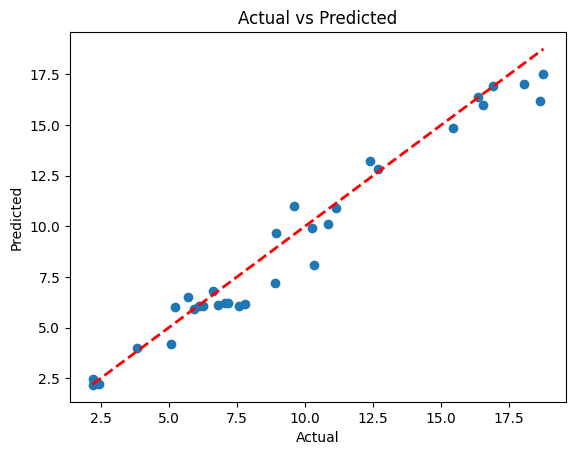

In [1985]:
## grafica de la prediccion
plt.scatter(test_y, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linestyle='--', linewidth=2)
plt.show()
